In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout

In [2]:
pwd

'/Users/macbook/Documents/python'

In [3]:
dataset=pd.read_csv('/Users/macbook/Documents/python/old-data/out-maj-phase0.csv', delim_whitespace=True, header=None)

In [6]:
dataset.columns=['gm1','gm2', 'gm3', 'a21','b32', 'alpha1','alpha2','alpha3','ph1','ph2', 'zm1', 'zm2', 'zm3', 'zmee', 'zme', 'Dmsol', 'Dmatm', 'th12',
               'th13', 'th23', 'phi1', 'phi2']

In [8]:
dataset=dataset.dropna()


In [10]:
dataset.iloc[[1,2],:]


,gm1,gm2,gm3,a21,b32,alpha1,alpha2,alpha3,ph1,ph2,...,zm3,zmee,zme,Dmsol,Dmatm,th12,th13,th23,phi1,phi2
1,0.14702,0.1475,0.181251,0.0065,0.51,0.1,4,2,236,56,...,0.147968,0.067108,0.123068,-0.001347,0.008000,27.4552,9.52090,58.4046,135.320,303.517
2,0.14702,0.1475,0.181850,0.0065,0.52,0.1,4,2,236,56,...,0.148434,0.068561,0.123071,-0.001344,0.008134,27.4714,9.42393,58.2614,135.285,303.553


In [11]:
dataframe = dataset.values
# split into input (X) and output (Y) variables
X= dataframe[:,0:10]
Y= dataframe[:,10:]

In [16]:
sc = StandardScaler()
Y= sc.fit_transform(Y)

In [ ]:
sc = StandardScaler()
X= sc.fit_transform(X)

In [17]:
numpy.set_printoptions(precision=4)
print(X[0:1,:])
print(Y[0:1,:])

[[-1.4576 -1.463  -1.5315 -1.4635 -1.4638 -1.463  -1.463  -1.463  -1.463
  -1.463 ]
 [-1.4576 -1.463  -1.503  -1.4635 -0.8783 -1.463  -1.463  -1.463  -1.463
  -1.463 ]
 [-1.4576 -1.463  -1.4747 -1.4635 -0.2927 -1.463  -1.463  -1.463  -1.463
  -1.463 ]
 [-1.4576 -1.463  -1.4464 -1.4635  0.2928 -1.463  -1.463  -1.463  -1.463
  -1.463 ]
 [-1.4576 -1.463  -1.4182 -1.4635  0.8784 -1.463  -1.463  -1.463  -1.463
  -1.463 ]]
[[-1.4842 -1.391  -1.5616 -2.0991 -1.5009  1.0988 -1.6407  0.5951  0.3926
  -0.0583 -0.4882  1.2387]
 [-1.4841 -1.3897 -1.5347 -2.0678 -1.5008  1.1033 -1.586   0.5967  0.3652
  -0.0956 -0.4885  1.2391]
 [-1.484  -1.3885 -1.5079 -2.0144 -1.5006  1.1077 -1.5312  0.5981  0.3388
  -0.1318 -0.4888  1.2394]
 [-1.484  -1.3873 -1.481  -1.9424 -1.5004  1.112  -1.4763  0.5995  0.3133
  -0.1667 -0.4892  1.2397]
 [-1.4838 -1.3861 -1.4543 -1.8556 -1.5002  1.1161 -1.4213  0.6009  0.2886
  -0.2005 -0.4895  1.24  ]]


In [546]:
#spliting the Data into test-validation samples
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.02, random_state=4)
X_valid.shape

(934, 10)

In [554]:
#model definition
model = Sequential()
model.add(Dense(600, input_shape = (10,))) 
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(200)) 
model.add(Activation('relu'))

model.add(Dense(40)) 
model.add(Activation('relu'))

model.add(Dense(12)) 
model.add(Activation('linear'))


In [555]:

model.compile(optimizer = 'Adam',  loss = 'mean_squared_error', metrics = ['mape', 'mae'])   


In [556]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 600)               6600      
_________________________________________________________________
activation_45 (Activation)   (None, 600)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 200)               120200    
_________________________________________________________________
activation_46 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 40)                8040      
_________________________________________________________________
activation_47 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 12)              

In [557]:
 history=model.fit(X_train, Y_train, batch_size = 512, epochs = 200,validation_split=0.04, verbose=1)

Epoch 1/200
86/86 [==============================] - 1s 10ms/step - loss: 0.7149 - mape: 277.7696 - mae: 0.6163 - val_loss: 0.2423 - val_mape: 164.0311 - val_mae: 0.3389
Epoch 2/200
86/86 [==============================] - 1s 9ms/step - loss: 0.2108 - mape: 175.0532 - mae: 0.3103 - val_loss: 0.1627 - val_mape: 123.7398 - val_mae: 0.2654
Epoch 3/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1527 - mape: 118.6121 - mae: 0.2542 - val_loss: 0.1355 - val_mape: 99.2198 - val_mae: 0.2332
Epoch 4/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1304 - mape: 120.4382 - mae: 0.2274 - val_loss: 0.1204 - val_mape: 85.5097 - val_mae: 0.2169
Epoch 5/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1157 - mape: 105.7455 - mae: 0.2094 - val_loss: 0.1068 - val_mape: 87.3849 - val_mae: 0.1957
Epoch 6/200
86/86 [==============================] - 1s 9ms/step - loss: 0.1049 - mape: 100.1319 - mae: 0.1953 - val_loss: 0.1009 - val_mape: 107.1351 - val_

86/86 [==============================] - 1s 9ms/step - loss: 0.0126 - mape: 45.9696 - mae: 0.0611 - val_loss: 0.0127 - val_mape: 39.7900 - val_mae: 0.0605
Epoch 98/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0125 - mape: 46.4431 - mae: 0.0608 - val_loss: 0.0177 - val_mape: 44.6822 - val_mae: 0.0687
Epoch 99/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0136 - mape: 50.6430 - mae: 0.0624 - val_loss: 0.0131 - val_mape: 33.0831 - val_mae: 0.0602
Epoch 100/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0126 - mape: 45.2054 - mae: 0.0598 - val_loss: 0.0139 - val_mape: 43.8900 - val_mae: 0.0645
Epoch 101/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0128 - mape: 40.3477 - mae: 0.0610 - val_loss: 0.0143 - val_mape: 44.8288 - val_mae: 0.0630
Epoch 102/200
86/86 [==============================] - 1s 9ms/step - loss: 0.0126 - mape: 43.6876 - mae: 0.0602 - val_loss: 0.0132 - val_mape: 32.1999 - val_mae: 0.0617
Ep

86/86 [==============================] - 1s 13ms/step - loss: 0.0088 - mape: 46.4145 - mae: 0.0497 - val_loss: 0.0068 - val_mape: 28.1374 - val_mae: 0.0420
Epoch 194/200
86/86 [==============================] - 1s 11ms/step - loss: 0.0061 - mape: 33.0790 - mae: 0.0421 - val_loss: 0.0051 - val_mape: 27.7650 - val_mae: 0.0387
Epoch 195/200
86/86 [==============================] - 1s 11ms/step - loss: 0.0065 - mape: 32.4714 - mae: 0.0427 - val_loss: 0.0084 - val_mape: 37.7949 - val_mae: 0.0518
Epoch 196/200
86/86 [==============================] - 1s 11ms/step - loss: 0.0071 - mape: 33.2500 - mae: 0.0457 - val_loss: 0.0055 - val_mape: 28.0399 - val_mae: 0.0399
Epoch 197/200
86/86 [==============================] - 1s 10ms/step - loss: 0.0067 - mape: 32.1067 - mae: 0.0432 - val_loss: 0.0097 - val_mape: 39.5549 - val_mae: 0.0535
Epoch 198/200
86/86 [==============================] - 1s 11ms/step - loss: 0.0063 - mape: 33.3094 - mae: 0.0437 - val_loss: 0.0052 - val_mape: 28.0409 - val_mae: 0

In [558]:
Y_pred=model.predict(X_valid);
Y_pred[0,:]

array([ 0.4303,  0.1713,  0.4091,  0.8391,  0.4936, -1.3039,  0.7272,
       -1.3505,  0.6115, -0.4181, -1.2119, -0.2792], dtype=float32)

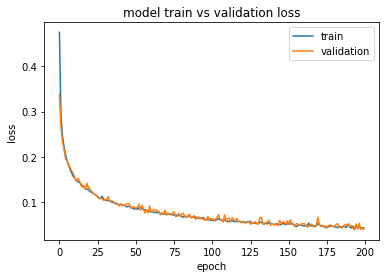

In [559]:
from matplotlib import pyplot

pyplot.plot(history.history['mae'])
pyplot.plot(history.history['val_mae'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [560]:
 #model.save('Majorana-withphase')

In [561]:
Y_pred=sc.inverse_transform(Y_pred)


In [562]:
Y_valid=sc.inverse_transform(Y_valid)

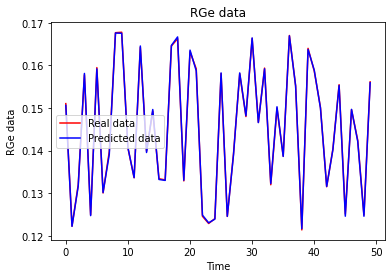

0 zm1


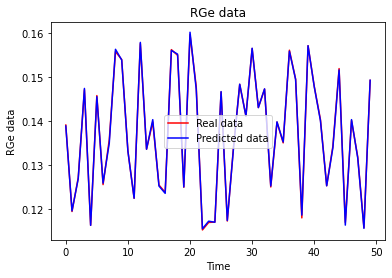

1 zm2


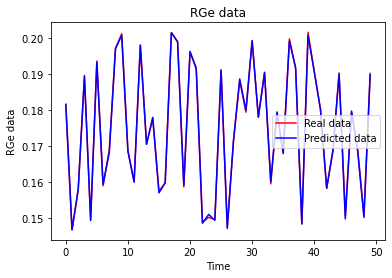

2 zm3


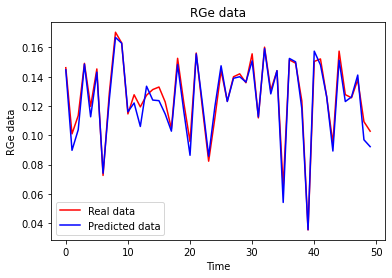

3 zmee


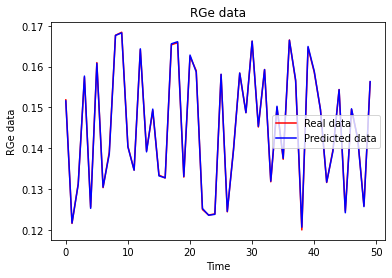

4 zme


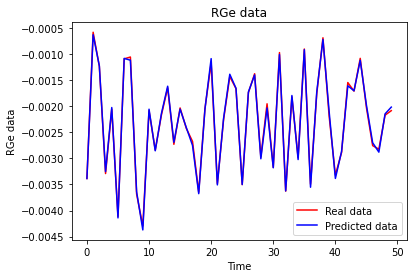

5 Dmsol


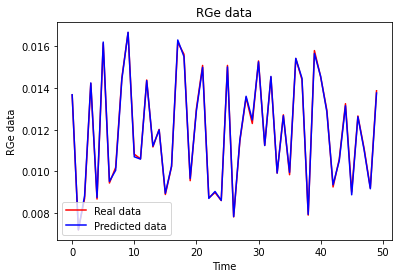

6 Dmatm


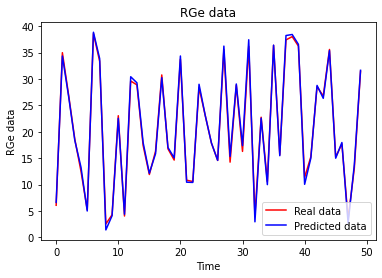

7 th12


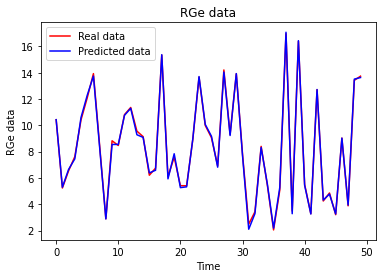

8 th13


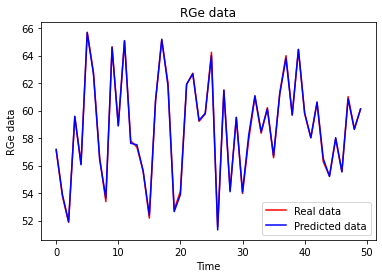

9 th23


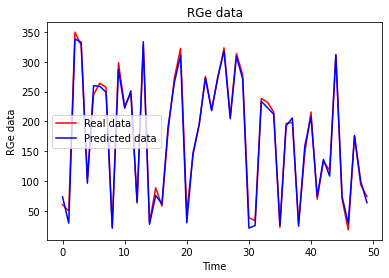

10 phi1


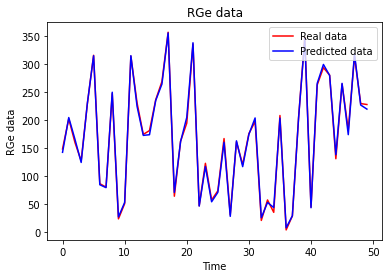

11 phi2


In [563]:
for i in range(12):
    plt.plot(Y_pred[0:50,i], color='red',label='Real data')
    plt.plot(Y_valid[0:50,i], color='blue',label='Predicted data')
    plt.title('RGe data')
    plt.xlabel('Time')
    plt.ylabel('RGe data')
    plt.legend()
    plt.show()
    print(i,dataset.columns[10+i])